In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
vectors = pd.read_feather('data/1m.ftr')
corr = vectors.corr()
vectors.shape

(473641, 40)

In [3]:
vectors.iloc[:5, :5]

,Special Gasoline,Special Diesel,Lubricant,Diesel Auto Clean,Gasoline
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,1,1,0
4,1,0,0,0,0


### Plot Correlation Matrix 

In [4]:
def triangle_map(corrmat):
    fig, ax = plt.subplots(figsize=(12,12))
    df_lt = corrmat.where(np.tril(np.ones(corrmat.shape)).astype(np.bool))
    sns.heatmap(df_lt, cmap='binary', square=True, linewidths=0.2)
    plt.show()

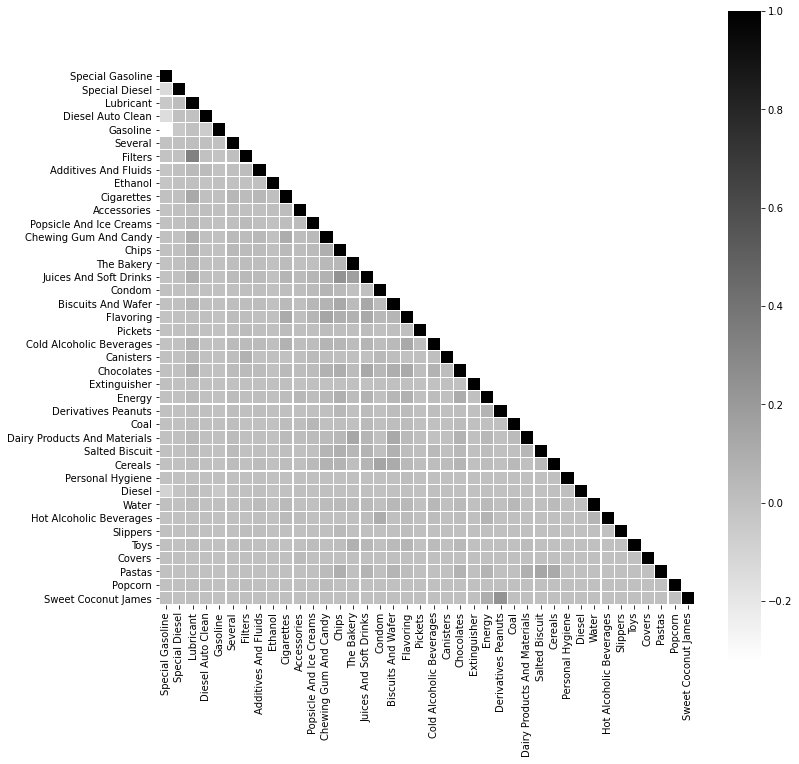

In [5]:
triangle_map(corr)

### Make Graph

In [6]:
# Vectorized distance function to transform matrix
def dfunc(cell):
        return np.sqrt(2 * (1 - cell))

In [7]:
# Generates an encoded dictionary mapping each 
# node to an encoded value for each product
def make_labels(vec_df, limit=None):
    # Get columns and restrict if specified
    cols = vec_df.columns
    cols = cols[:limit] if limit else cols
    
    # Encode each label
    le = LabelEncoder()
    encoded = le.fit_transform(cols)
    
    # Generate a dict mapping each node to a label
    labels = {i:encoded[i] for i in range(len(cols))}
    
    # Make a legend for products and encodings
    legend = list(zip(encoded, vectors.columns))
    # Sort the legend for ease of use
    legend.sort()
    legend = dict(legend)
    
    # Generate a dict mapping each node to a label
#     labels = {}
#     for i in range(len(cols)):
#         labels[i] = encoded[i]
    
    return labels, legend

In [16]:
# Draw a graph with the specified parameters
def draw(G, pos, ax, node_color='c', node_size=400, width=1, edge_color='0.25', font_size=15):
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color=node_color, node_size=node_size)
    nx.draw_networkx_edges(G, pos, ax=ax, width=width, edge_color=edge_color)
    nx.draw_networkx_labels(G, pos, labels, ax=ax, font_size=font_size)

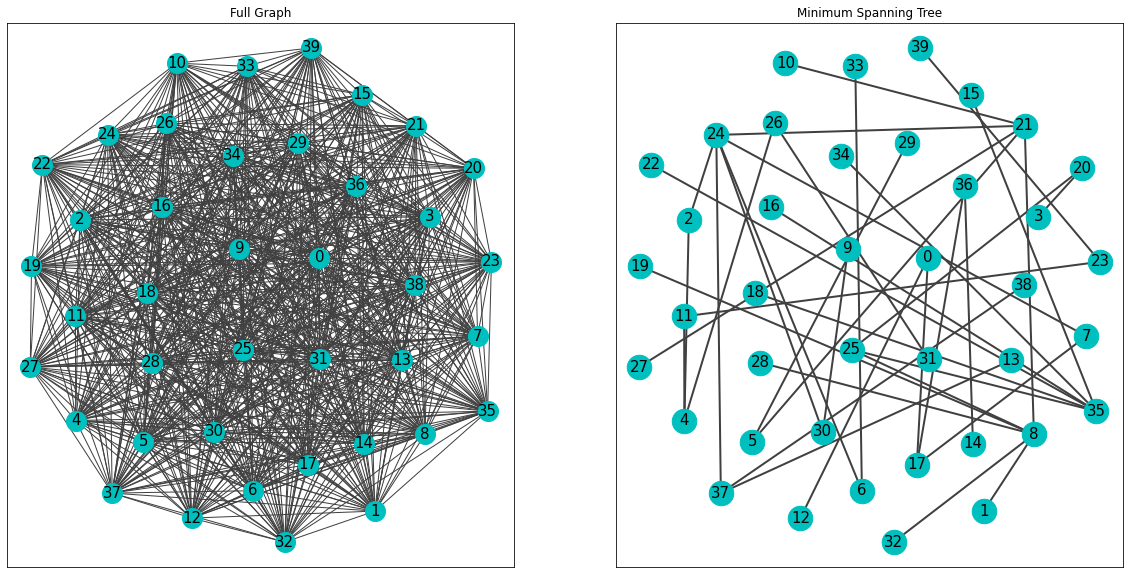

{0: 'Accessories',
 1: 'Additives And Fluids',
 2: 'Biscuits And Wafer',
 3: 'Canisters',
 4: 'Cereals',
 5: 'Chewing Gum And Candy',
 6: 'Chips',
 7: 'Chocolates',
 8: 'Cigarettes',
 9: 'Coal',
 10: 'Cold Alcoholic Beverages',
 11: 'Condom',
 12: 'Covers',
 13: 'Dairy Products And Materials',
 14: 'Derivatives Peanuts',
 15: 'Diesel',
 16: 'Diesel Auto Clean',
 17: 'Energy',
 18: 'Ethanol',
 19: 'Extinguisher',
 20: 'Filters',
 21: 'Flavoring',
 22: 'Gasoline',
 23: 'Hot Alcoholic Beverages',
 24: 'Juices And Soft Drinks',
 25: 'Lubricant',
 26: 'Pastas',
 27: 'Personal Hygiene',
 28: 'Pickets',
 29: 'Popcorn',
 30: 'Popsicle And Ice Creams',
 31: 'Salted Biscuit',
 32: 'Several',
 33: 'Slippers',
 34: 'Special Diesel',
 35: 'Special Gasoline',
 36: 'Sweet Coconut James',
 37: 'The Bakery',
 38: 'Toys',
 39: 'Water'}

In [17]:
# Global variables
limit = None
labels, legend = make_labels(vectors, limit=limit)
use_distance = True
# Make graphs 
corrmat = np.array(vectors.corr())
corrmat = np.absolute(corrmat)
corrmat = dfunc(corrmat) if use_distance else corrmat
corrmat = corrmat[:limit, :limit] if limit else corrmat
G = nx.from_numpy_matrix(corrmat) # Graph
MST = nx.minimum_spanning_tree(G) # Minimum Spanning Tree

# Uniform layout for all plots to follow
pos = nx.spring_layout(G)

# Axes to draw on
nrows, ncols = 1,2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 10*nrows))

# Draw full graph
draw(G, pos, ax[0])
ax[0].set_title('Full Graph')

# Draw MST
draw(MST, pos, ax[1], node_size=600, width=2)
ax[1].set_title('Minimum Spanning Tree')

# Show
plt.show()

# Use to map numbers to products
legend

In [10]:
# Sort the edges by shortest values (i.e. closest relations)
E = [(a,b,c['weight']) for (a,b,c) in MST.edges(data=True)]
E = sorted(E, key=lambda x: x[2], reverse=False)

In [11]:
for edge in E:
    print(f'{legend[edge[0]]} -> {legend[edge[1]]}: {edge[2]:.8f}')

Biscuits And Wafer -> Chips: 1.16009083
Accessories -> Cereals: 1.16033271
Lubricant -> Water: 1.23636723
Dairy Products And Materials -> Diesel: 1.23654453
Derivatives Peanuts -> Diesel: 1.28746181
Accessories -> Canisters: 1.30462615
Diesel Auto Clean -> Popcorn: 1.30820412
Covers -> Ethanol: 1.31177165
Pickets -> The Bakery: 1.31250606
Accessories -> Additives And Fluids: 1.31795198
Derivatives Peanuts -> Personal Hygiene: 1.31858054
Diesel -> Energy: 1.32141885
Biscuits And Wafer -> Coal: 1.32378958
Ethanol -> Filters: 1.32420975
Diesel -> Gasoline: 1.32422474
Diesel -> Ethanol: 1.32773098
Popcorn -> The Bakery: 1.32827863
Energy -> Popcorn: 1.33343152
Coal -> Ethanol: 1.33418654
Gasoline -> Juices And Soft Drinks: 1.33889547
Diesel Auto Clean -> Slippers: 1.34011676
Accessories -> Salted Biscuit: 1.34405572
Juices And Soft Drinks -> Water: 1.34636740
Derivatives Peanuts -> Special Gasoline: 1.35686595
Chips -> Flavoring: 1.36047530
Several -> Slippers: 1.37069196
Condom -> Diesel:

In [12]:
r = np.arange(-1, 1, 0.1)
[round(x, 2) for x in r]

[-1.0,
 -0.9,
 -0.8,
 -0.7,
 -0.6,
 -0.5,
 -0.4,
 -0.3,
 -0.2,
 -0.1,
 -0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9]

In [13]:
dfunc(r)

array([2.        , 1.94935887, 1.8973666 , 1.84390889, 1.78885438,
       1.73205081, 1.67332005, 1.61245155, 1.54919334, 1.4832397 ,
       1.41421356, 1.34164079, 1.26491106, 1.18321596, 1.09544512,
       1.        , 0.89442719, 0.77459667, 0.63245553, 0.4472136 ])